In [1]:
source('find_feat.r')
source('raw2peak_table.r')
library("RColorBrewer")
library(vegan)
#library(ggpubr)
#library('survminer')
#library('survival')
#library('pROC')

Loading required package: pacman

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7



In [2]:
ccp <- read.delim('bind_postprocess_N_C/saliva_urina_ccp_bind_posprocess.tsv', check.names=FALSE)
cg <- read.delim('bind_postprocess_N_C/saliva_urina_cg_bind_posprocess.tsv', check.names=FALSE)
vip_ccp <- read.delim('bind_postprocess_N_C/plsda_vip_cpp_bind_postprocess_N_C.tsv', check.names=FALSE)
vip_cg <- read.delim('bind_postprocess_N_C/plsda_vip_cg_bind_postprocess_N_C.tsv', check.names=FALSE)

rowcols = rep(1, nrow(ccp))
col <- colorRampPalette(brewer.pal(10, "RdYlBu"))(256)
classes <- sub("^\\d+", "", rownames(ccp))
uclasses <- unique(classes)
for(i in 2:length(uclasses)) {
    rowcols[grepl(uclasses[i], classes)] <- i
}
rowcols <- colorRampPalette(c('blue', 'red'))(length(uclasses))[rowcols]

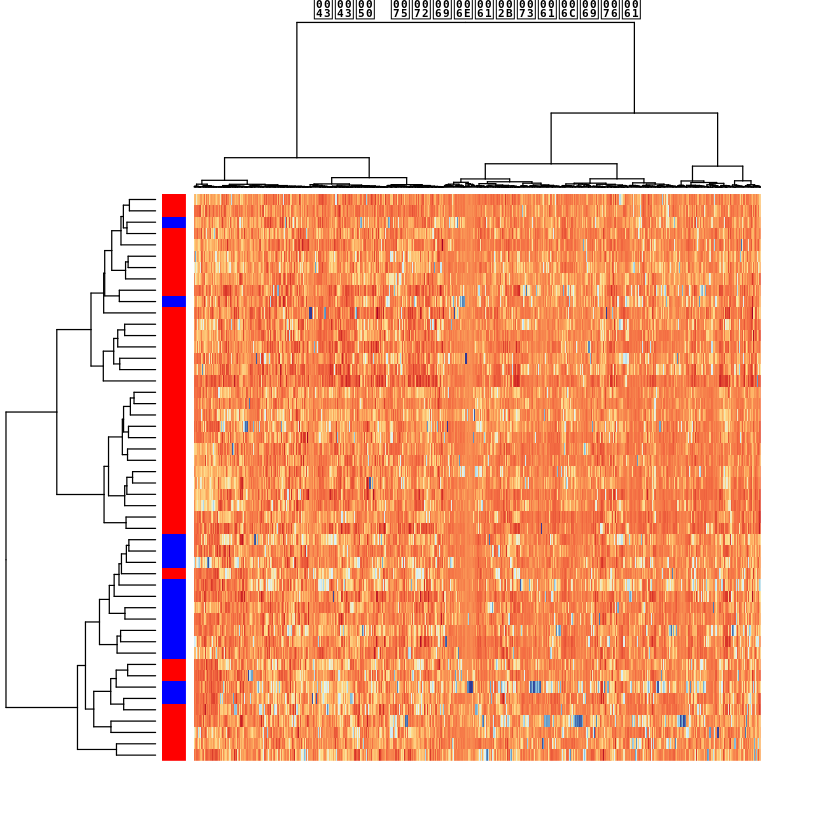

In [3]:
heatmap(as.matrix(ccp), scale = "column", col =  col, dist= function(x) vegdist(x, method="bray"),
        hclustfun = function(d) hclust(d, method="ward.D"), labRow = FALSE, labCol = FALSE,
        RowSideColors = rowcols, main='CCP urina+saliva')

[1] "C" "N"

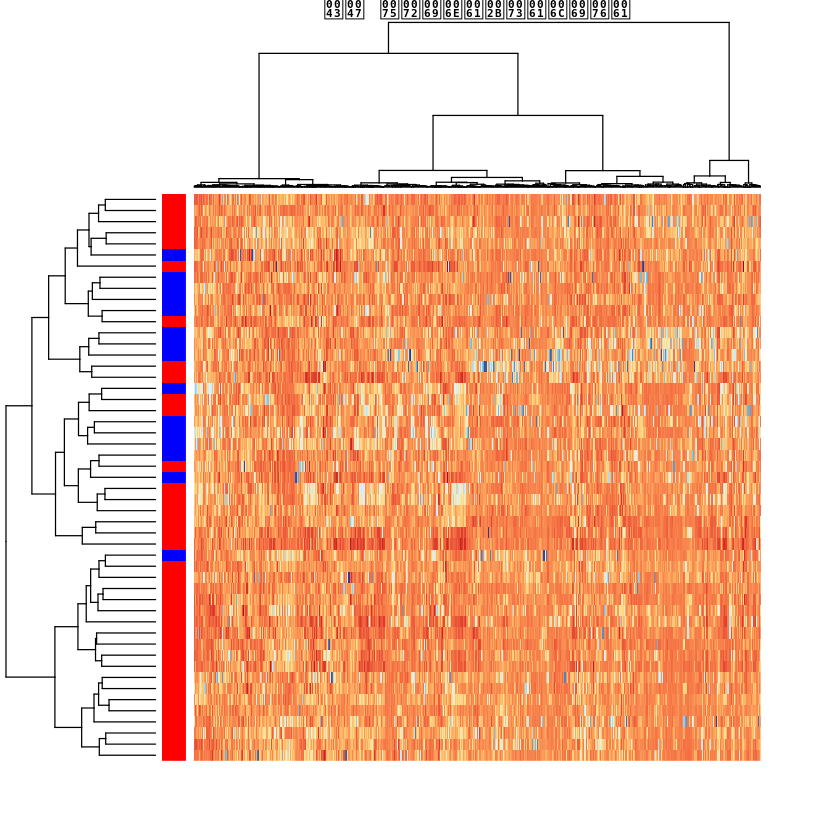

In [5]:
rowcols = rep(1, nrow(cg))
classes <- sub("^\\d+", "", rownames(cg))
uclasses <- unique(classes)
uclasses
for(i in 2:length(uclasses)) {
    rowcols[grepl(uclasses[i], classes)] <- i
}
rowcols <- colorRampPalette(c('blue', 'red'))(length(uclasses))[rowcols]

heatmap(as.matrix(cg), scale = "column", col =  col, dist= function(x) dist(x, method="canberra"),
        hclustfun = function(d) hclust(d, method="ward.D"), labRow = FALSE, labCol = FALSE,
        RowSideColors = rowcols, main='CG urina+saliva')

In [6]:
cg$Group <- classes

rowcols = rep(1, nrow(ccp))
classes <- sub("^\\d+", "", rownames(ccp))
ccp$Group <- classes

In [7]:
head(vip_ccp[order(vip_ccp[,2], decreasing=TRUE),] )

,V1,V2
,<fct>,<dbl>
219,X34.2215013117672,2.587336
196,X30.762481418979,2.561514
205,X31.9657609462805,2.511199
215,X33.6685945213569,2.507612
239,X36.3346787279433,2.484618
157,X25.1650775603914,2.481607


In [9]:
#install.packages('ggpubr')
library('ggpubr')


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend




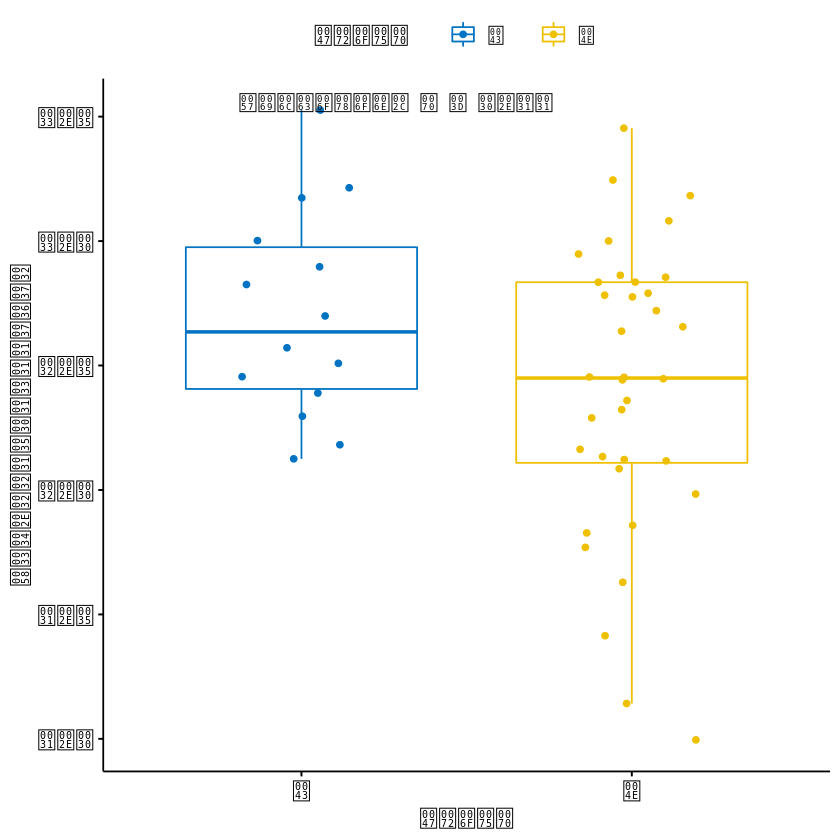

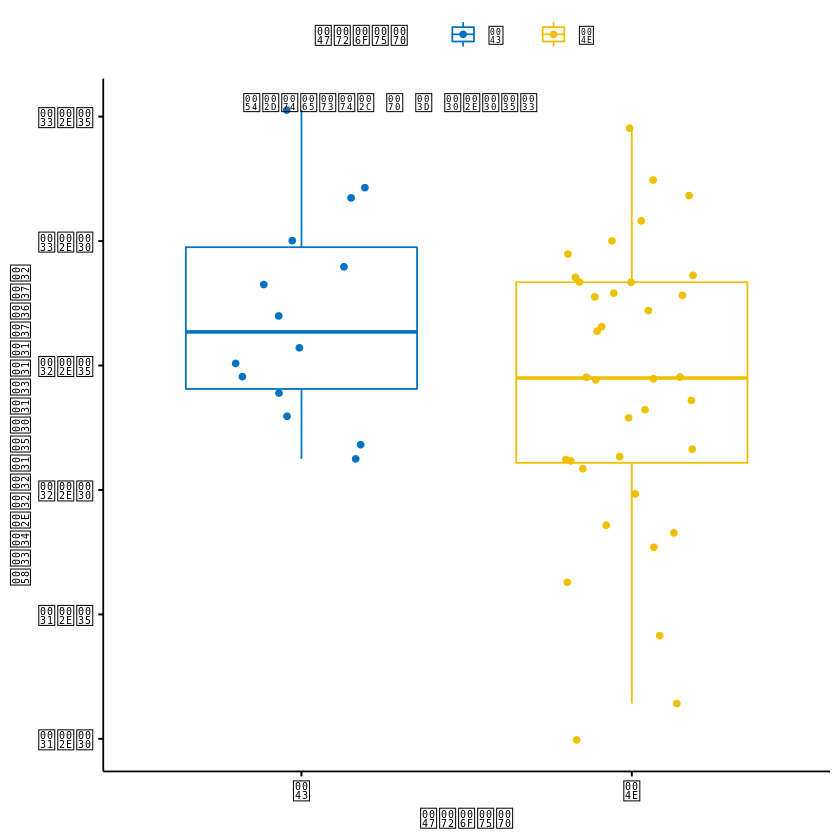

In [10]:
ccp$X34.2215013117672 <- log(ccp$X34.2215013117672)

p <- ggboxplot(ccp, x = "Group", y = "X34.2215013117672",
          color = "Group", palette = "jco",
          add = "jitter")
#  Add p-value
p + stat_compare_means()
# Change method
p + stat_compare_means(method = "t.test")

In [11]:
head(vip_cg[order(vip_cg[,2], decreasing=TRUE),] )

,V1,V2
,<fct>,<dbl>
188,X31.9657917333848,2.624263
166,X29.4916637526402,2.607483
147,X26.6481421353723,2.564769
202,X34.2213552816341,2.542074
178,X30.7623401614714,2.533773
119,X20.7098715263414,2.531133


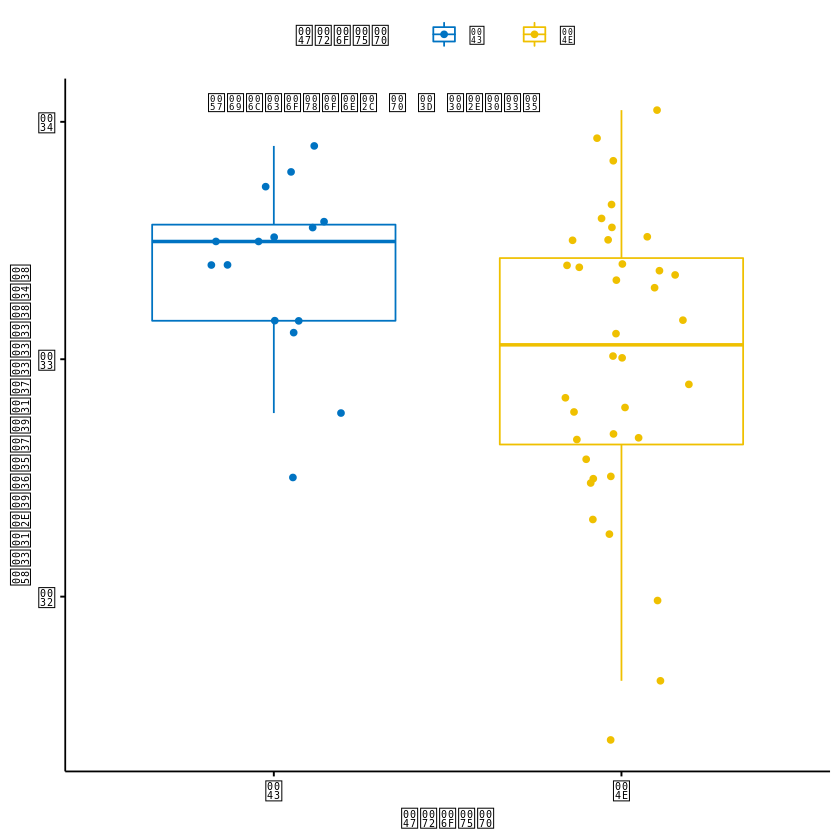

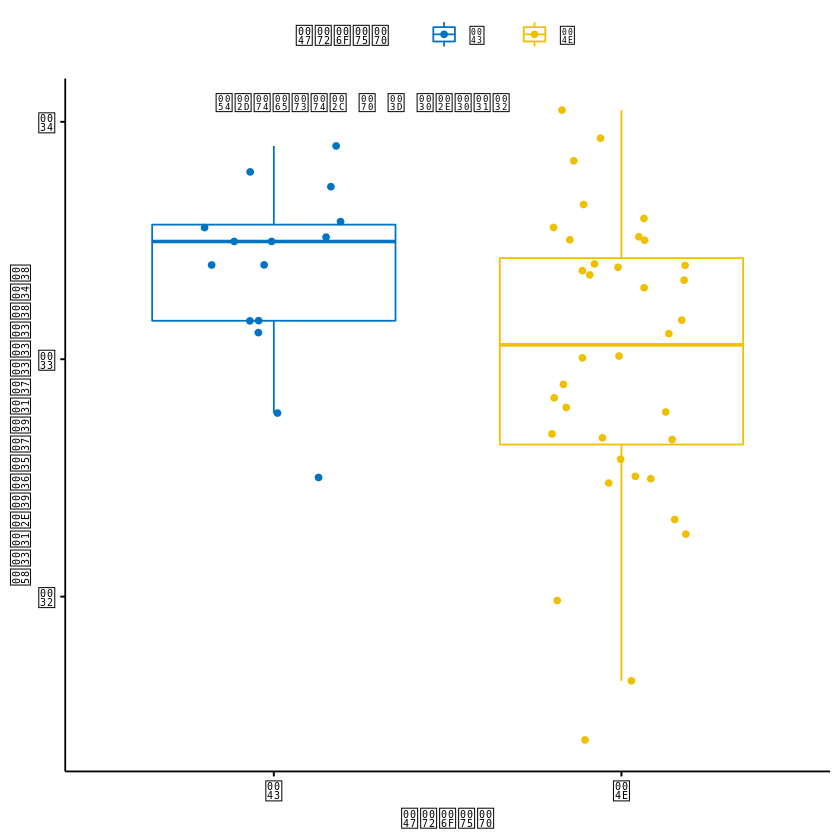

In [12]:
cg$X31.9657917333848 <- log(cg$X31.9657917333848)

p <- ggboxplot(cg, x = "Group", y = "X31.9657917333848",
          color = "Group", palette = "jco",
          add = "jitter")
#  Add p-value
p + stat_compare_means()
# Change method
p + stat_compare_means(method = "t.test")

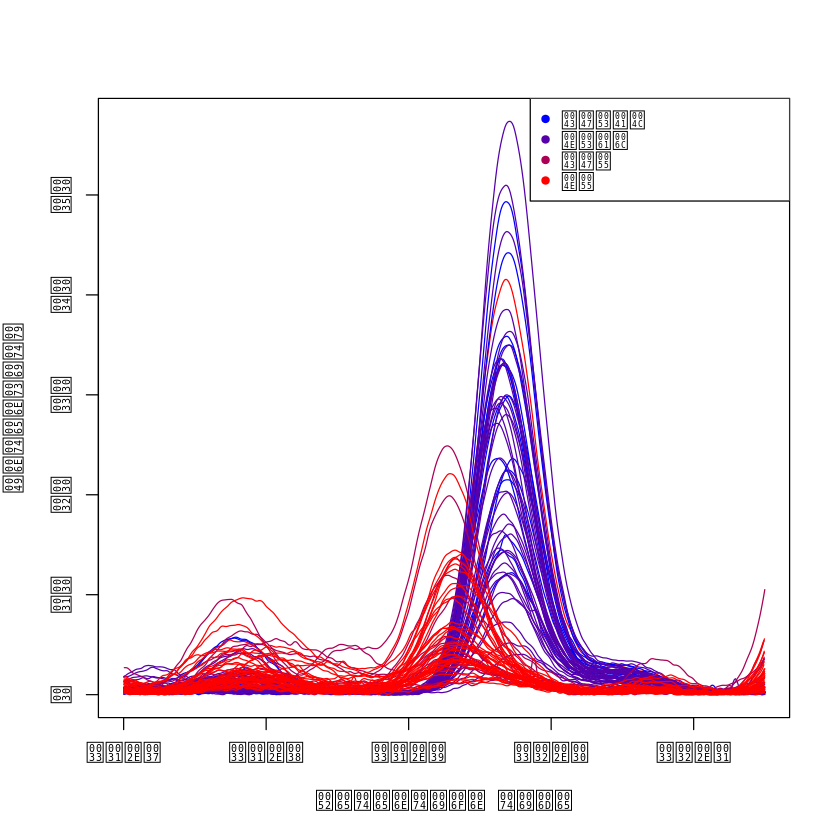

In [14]:
spectra <- loadData(c('./arquivos_csv/Saliva CG/', 
                      './arquivos_csv/Saliva Saudavel/',  
                      './arquivos_csv/Urina CG/',  
                     './arquivos_csv/Urina Saudavel/'
      ))
spc <- featMat(spectra, type='aln')
rowcols = rep(1, length(spc))
classes <- sub("^\\d+", "", unlist(lapply(spc, function(x) x@metaData$name)))
uclasses <- unique(classes)
for(i in 2:length(uclasses)) {
    rowcols[grepl(uclasses[i], classes)] <- i
}
rowcols <- colorRampPalette(c('blue', 'red'))(length(uclasses))[rowcols]
                                          
mx <- 0
for(i in 1:length(spc)){
    idx <- spc[[i]]@mass>31.7 & spc[[i]]@mass<32.15
    imx <- max(spc[[i]]@intensity[idx])
    if (imx>mx){
        mx <- imx
    }
}

idx <- spc[[1]]@mass>31.7 & spc[[1]]@mass<32.15
plot(spc[[1]]@mass[idx], spc[[1]]@intensity[idx], col=rowcols[i], type='l', ylim=c(0, mx),
     xlab='Retention time', ylab='Intensity')
for(i in 2:length(spc)){
    idx <- spc[[i]]@mass>31.7 & spc[[i]]@mass<32.15
    lines(spc[[i]]@mass[idx], spc[[i]]@intensity[idx], col=rowcols[i], ylim=c(0, mx))
}

legend('topright', legend=uclasses,
       col=unique(rowcols), pch=19, cex=0.8)